### Analyzing and Predicting Customer Churn Prediction

Customer Churn prediction is a measure why customers are quiting a bussiness. This notebook focuses on customer churn in telecom bussiness and focusing on data cleaning,handling imbalance data,data tranforming,visualizing data,gathering insights

In [94]:
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("customer_churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


With info fuction we can understand as there is no null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Initially,dropping customerID columns because it does not play important role

In [8]:
df.drop('customerID',axis=1,inplace=True)

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges feature holds object value as it should be numeric term, hence type casting it.

In [12]:
df.TotalCharges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
6925.9      1
4689.5      1
660.05      1
417.7       1
7782.85     1
Name: TotalCharges, Length: 6531, dtype: int64

This feature also has some blank values in it,hence dropping such rows

In [14]:
df[df.TotalCharges==' ']

(11, 20)

In [17]:
df1=df[df.TotalCharges!=' ']

In [18]:
df1.shape

(7032, 20)

In [37]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [21]:
df1.dtypes    #values are transformed into float type

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Possibily find the reasons,Visualzing data Churn[Yes or No] based on different features

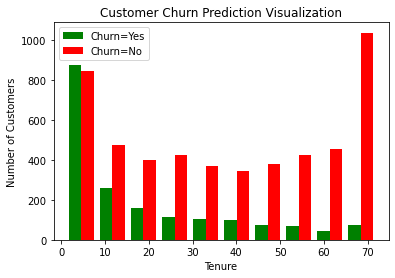

In [33]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

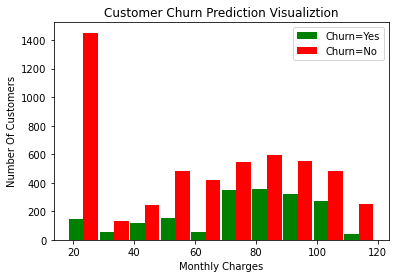

In [41]:
monthlycharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
monthlycharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges 
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([monthlycharges_churn_yes,monthlycharges_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [46]:
def print_unique(df):
    for column in df:
        if df[column].dtypes=='object':
            print('{}:{}'.format(column,df[column].unique()))

In [47]:
print_unique(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


As we can see, most of the columns are categorical binary class and multiclass hence we can encode them

In general sense,we can understand that 'No phone service'/'No internet service' and 'No' are same so replacing them with simple No

In [48]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

In [49]:
print_unique(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Now converting all Yes and No to 0 or 1

In [52]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [53]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [54]:
print_unique(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [55]:
for col in df1:
    print('{}:{}'.format(col,df1[col].unique()))

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [56]:
df1.gender.replace({'Female':0,'Male':1},inplace=True)

In [57]:
df1.gender.unique()

array([0, 1], dtype=int64)

In [58]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [59]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6917,0,0,1,0,72,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [61]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [63]:
df2.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [64]:
df2.MonthlyCharges.unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [65]:
df2.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Perfroming mix-max scaler on above features,transfroming in 0-1 scale

In [67]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [69]:
for col in df2:
    print('{}:{}'.format(col,df2[col].unique()))

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [76]:
len(df2.columns)

27

As we have converted all the values in the numeric form,our dataset(df2) is ready for modeling

Performing Train-Test split

In [72]:
X=df2.drop('Churn',axis=1)
Y=df2.Churn

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [74]:
X_train.shape

(5625, 26)

In [75]:
X_test.shape

(1407, 26)

In [77]:
len(X_train.columns)

26

Using Machine Learning Algorithms (Logistic Regression,Random Forest)

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.8052594171997157

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7846481876332623

In [90]:
prediction_logr=log_reg.predict(X_test)

In [91]:
prediction_logr[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [92]:
y_test[:5]

6036    0
1204    0
5717    0
1739    1
4981    1
Name: Churn, dtype: int64

In [93]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,prediction_logr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1032
           1       0.66      0.56      0.60       375

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



Text(69.0, 0.5, 'Truth')

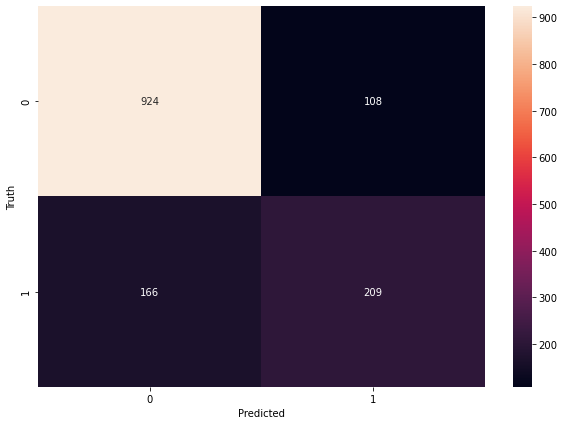

In [99]:
cm = confusion_matrix(y_test,prediction_logr)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Building a Deep Learning ANN model in tensorflow/keras

In [101]:
import tensorflow as tf
from tensorflow import keras



model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.7062
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7932
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.7990
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7898
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8029
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8092
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8097
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8020
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8135
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4116 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8290
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8308
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8336
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8327
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8305
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8345
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8293
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8283
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8177
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 

In [102]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 974us/step - loss: 0.4607 - accuracy: 0.7875


[0.4607372581958771, 0.7874911427497864]

In [103]:
yp = model.predict(X_test)
yp[:5]

array([[0.27009138],
       [0.16225985],
       [0.07036668],
       [0.74180734],
       [0.71772456]], dtype=float32)

In [104]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [105]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [106]:
y_test[:5]

6036    0
1204    0
5717    0
1739    1
4981    1
Name: Churn, dtype: int64

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1032
           1       0.65      0.45      0.53       375

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



Text(69.0, 0.5, 'Truth')

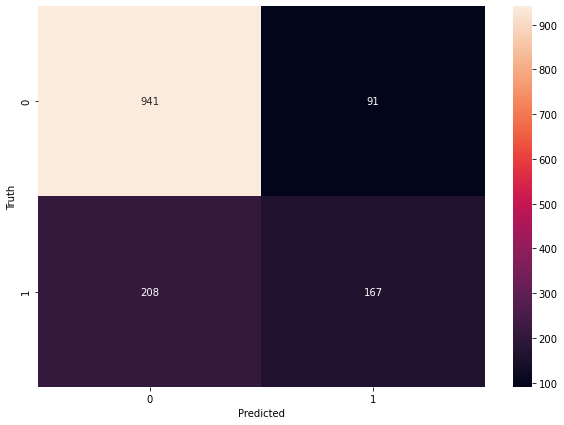

In [108]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')